Importamos Librerias

In [148]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




***Limpieza y preparación de Datos*** <br>
Leemos archivos y los convertimos a un solo DataFrame <br>
En esta etapa se realizara el proceso de limpiar y preparar los datos con Pandas sobre el Dataset de los datos inmobiliarios de Cordoba

In [149]:


# Cargando el archivo JSON en un DataFrame
Cordoba = pd.read_json('datos_inmuebles.json')

# Mostrar el DataFrame
print(Cordoba)


# Imprimir los primeros registros del DataFrame 
print(Cordoba.head())



        id TipoDeInmueble TipoDeOperacion  Dormitorios    Precio   Moneda  \
0        1   Departamento      Alquileres          1.0  120000.0    Pesos   
1        2           Casa      Alquileres          3.0    2000.0  Dólares   
2        3           Casa      Alquileres          3.0    2000.0  Dólares   
3        4       Comercio      Alquileres          NaN  800000.0    Pesos   
4        5   Departamento      Alquileres          1.0  120000.0    Pesos   
...    ...            ...             ...          ...       ...      ...   
2731  2732           null            null          NaN   90000.0    Pesos   
2732  2733           null            null          NaN   50000.0    Pesos   
2733  2734           null            null          NaN   90000.0    Pesos   
2734  2735           null            null          NaN   10000.0    Pesos   
2735  2736           null            null          NaN   10000.0    Pesos   

                   Zona FechaDeActualización  \
0             Bº Centro    

El .Shape Atributo de Pandas DataFrame Proporciona una Estructura General de los datos, devuelve una tupla de longitud 2 que se traduce en cuantas filas de observaciones y columnas tiene el conjutno de datos

In [150]:
Cordoba.shape

(2736, 9)

In [151]:

#obtener los tipos de datos de cada columna en un DataFrame. 
Cordoba.dtypes



id                        int64
TipoDeInmueble           object
TipoDeOperacion          object
Dormitorios             float64
Precio                  float64
Moneda                   object
Zona                     object
FechaDeActualización     object
Descripcion              object
dtype: object

In [152]:


#Comprobamos el nombre de columnas
Cordoba.columns



Index(['id', 'TipoDeInmueble', 'TipoDeOperacion', 'Dormitorios', 'Precio',
       'Moneda', 'Zona', 'FechaDeActualización', 'Descripcion'],
      dtype='object')

In [153]:


# Mostramos los primeros 5 registros por defecto
Cordoba.head()



,id,TipoDeInmueble,TipoDeOperacion,Dormitorios,Precio,Moneda,Zona,FechaDeActualización,Descripcion
0,1,Departamento,Alquileres,1.0,120000.0,Pesos,Bº Centro,08.10.2023,Centro- Calle Belgrano 280- Externo- Living- C...
1,2,Casa,Alquileres,3.0,2000.0,Dólares,Bº El Bosque,08.10.2023,El Bosque Alquiler- 3 Dormitorios en planta ...
2,3,Casa,Alquileres,3.0,2000.0,Dólares,Bº El Bosque,08.10.2023,ALQUILER - El Bosque - 3 Dormitorios en planta...
3,4,Comercio,Alquileres,NaN,800000.0,Pesos,Bº Villa Belgrano,08.10.2023,Excelente local en alquiler en Villa Belgrano ...
4,5,Departamento,Alquileres,1.0,120000.0,Pesos,Bº Centro,08.10.2023,Alquilo hermoso depto de 1 dormitorio con Balcón


In [154]:
# Revisamos los datos para comproabr si existen datos nulos.
Cordoba.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2736 non-null   int64  
 1   TipoDeInmueble        2736 non-null   object 
 2   TipoDeOperacion       2736 non-null   object 
 3   Dormitorios           1318 non-null   float64
 4   Precio                2516 non-null   float64
 5   Moneda                2736 non-null   object 
 6   Zona                  2736 non-null   object 
 7   FechaDeActualización  2736 non-null   object 
 8   Descripcion           2736 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 192.5+ KB


Se observa que hay 220 datos que no tiene precio por lo cual se va a analizar si en la descripcion se puede obtener el dato, por lo cual voy a analizar la descripcion cuyo valor en el precio sea nulo 

In [155]:
import pandas as pd

df_cordoba_sin_precio = Cordoba[Cordoba['Precio'].isnull()]

#Genero un csv para ver si puedo observar si es posible obtener el dato faltante en la columna descripcion
df_cordoba_sin_precio.to_csv('df_cordoba_sin_precio.csv', index=False)





In [156]:
import pandas as pd

palabras_a_buscar = ['pesos', 'dólares', '$']

filas_coincidentes = []

# Iterando sobre la columna 'Descripcion'
for indice, descripcion in df_cordoba_sin_precio['Descripcion'].items():
   
    if any(palabra.lower() in descripcion.lower() for palabra in palabras_a_buscar):
      
        filas_coincidentes.append(indice)

df_resultante = Cordoba.loc[filas_coincidentes]


print(df_resultante)



Empty DataFrame
Columns: [id, TipoDeInmueble, TipoDeOperacion, Dormitorios, Precio, Moneda, Zona, FechaDeActualización, Descripcion]
Index: []


Al no encontrar datos y como suponer un precio, procedo a borrarlos


In [157]:
import pandas as pd

#El DataFrame Cordoba con Precios Verificados
Cordoba_PV = Cordoba.dropna(subset=['Precio'])



Tipo de Operacion es Alquiler Siempre 

In [158]:

Cordoba_PV = Cordoba_PV.copy()
Cordoba_PV['TipoDeOperacion'] = 'Alquiler'



Ahora Voy analizar los datos nulos que estan en Tipo de Inmueble

In [159]:
import pandas as pd

# Filtrar las filas donde 'TipoDeInmueble' es igual a 'null'
df_cordoba_datos_null = Cordoba_PV[Cordoba_PV['TipoDeInmueble'] == 'null']

df_cordoba_datos_null.to_csv('df_cordoba_datos_null_tipoDeInmueble.csv', index=False)




Se Arma una Funcion para obtener datos de la descripcion y llenarlos

In [160]:
import pandas as pd

# Suponiendo que ya has cargado tu DataFrame y se llama df_cordoba_datos_null

# Crear una función para asignar el tipo de inmueble según la descripción
def asignar_tipo_inmueble(descripcion):
    if 'Comercio' in descripcion or 'Local' in descripcion:
        return 'Comercio'
    elif 'Casa' in descripcion:
        return 'Casa'
    elif 'Duplex' in descripcion:
        return 'Duplex'
    else:
        return 'Departamento'

# Aplicar la función a la columna 'Descripcion' y asignar el resultado a la columna 'TipoDeInmueble'
df_cordoba_datos_null['TipoDeInmueble'] = df_cordoba_datos_null['Descripcion'].apply(asignar_tipo_inmueble)

# Mostrar el DataFrame resultante
print(df_cordoba_datos_null)

# Guardar el DataFrame con la nueva información en un archivo CSV
df_cordoba_datos_null.to_csv('df_cordoba_datos_null_con_tipos_inmueble.csv', index=False)


        id TipoDeInmueble TipoDeOperacion  Dormitorios    Precio   Moneda  \
31      32   Departamento        Alquiler          NaN  250000.0    Pesos   
108    109   Departamento        Alquiler          NaN    2300.0  Dólares   
111    112   Departamento        Alquiler          NaN  350000.0    Pesos   
113    114   Departamento        Alquiler          NaN   65000.0    Pesos   
115    116   Departamento        Alquiler          NaN   70000.0    Pesos   
...    ...            ...             ...          ...       ...      ...   
2731  2732   Departamento        Alquiler          NaN   90000.0    Pesos   
2732  2733   Departamento        Alquiler          NaN   50000.0    Pesos   
2733  2734           Casa        Alquiler          NaN   90000.0    Pesos   
2734  2735   Departamento        Alquiler          NaN   10000.0    Pesos   
2735  2736       Comercio        Alquiler          NaN   10000.0    Pesos   

                  Zona FechaDeActualización  \
31    Bº Nueva Córdoba      

C:\Users\elcoy\AppData\Local\Temp\ipykernel_13344\1930278188.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cordoba_datos_null['TipoDeInmueble'] = df_cordoba_datos_null['Descripcion'].apply(asignar_tipo_inmueble)


Aca lo que se busca es que en la descripcion se obtenga el numero de habitaciones

In [161]:
import pandas as pd
import re


def obtener_dormitorios_descripcion(descripcion):
    match = re.search(r'(\d+)\s*dor', descripcion, flags=re.IGNORECASE)
    if match:
        return int(match.group(1))
    else:
        return float(1)


df_cordoba_datos_null['Dormitorios'] = df_cordoba_datos_null['Descripcion'].apply(obtener_dormitorios_descripcion)


print(df_cordoba_datos_null)

# Guardar el DataFrame con la nueva información en un archivo CSV
df_cordoba_datos_null.to_csv('df_cordoba_datos_null_con_tipos_dormitorios_actualizado.csv', index=False)


        id TipoDeInmueble TipoDeOperacion  Dormitorios    Precio   Moneda  \
31      32   Departamento        Alquiler          1.0  250000.0    Pesos   
108    109   Departamento        Alquiler          1.0    2300.0  Dólares   
111    112   Departamento        Alquiler          1.0  350000.0    Pesos   
113    114   Departamento        Alquiler          1.0   65000.0    Pesos   
115    116   Departamento        Alquiler          1.0   70000.0    Pesos   
...    ...            ...             ...          ...       ...      ...   
2731  2732   Departamento        Alquiler          1.0   90000.0    Pesos   
2732  2733   Departamento        Alquiler          1.0   50000.0    Pesos   
2733  2734           Casa        Alquiler          1.0   90000.0    Pesos   
2734  2735   Departamento        Alquiler          1.0   10000.0    Pesos   
2735  2736       Comercio        Alquiler          1.0   10000.0    Pesos   

                  Zona FechaDeActualización  \
31    Bº Nueva Córdoba      

C:\Users\elcoy\AppData\Local\Temp\ipykernel_13344\2262717563.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cordoba_datos_null['Dormitorios'] = df_cordoba_datos_null['Descripcion'].apply(obtener_dormitorios_descripcion)


El histograma de Pandas agrupa números en rangos (o contenedores) y la altura de una barra muestra cuántos números se encuentran en ese rango. df.hist() traza un histograma de las características numéricas de los datos en una cuadrícula. También proporcionaremos los  argumentos figsize y  xrot para aumentar el tamaño de la cuadrícula y rotar el eje x 45 grados.

In [162]:
# Establecer 'id' como índice en ambos DataFrames
Cordoba_PV.set_index('id', inplace=True)
df_cordoba_datos_null.set_index('id', inplace=True)

# Actualizar los valores en Cordoba_PV con los valores de df_cordoba_datos_null_con_tipos_dormitorios
Cordoba_PV.update(df_cordoba_datos_null)

# Restaurar el índice para Cordoba_PV
Cordoba_PV.reset_index(inplace=True)

# Mostrar el DataFrame resultante
print(Cordoba_PV)

# Guardar el DataFrame actualizado en un archivo CSV
Cordoba_PV.to_csv('Cordoba_PV_actualizado.csv', index=False)



        id TipoDeInmueble TipoDeOperacion  Dormitorios    Precio   Moneda  \
0        1   Departamento        Alquiler          1.0  120000.0    Pesos   
1        2           Casa        Alquiler          3.0    2000.0  Dólares   
2        3           Casa        Alquiler          3.0    2000.0  Dólares   
3        4       Comercio        Alquiler          NaN  800000.0    Pesos   
4        5   Departamento        Alquiler          1.0  120000.0    Pesos   
...    ...            ...             ...          ...       ...      ...   
2511  2732   Departamento        Alquiler          1.0   90000.0    Pesos   
2512  2733   Departamento        Alquiler          1.0   50000.0    Pesos   
2513  2734           Casa        Alquiler          1.0   90000.0    Pesos   
2514  2735   Departamento        Alquiler          1.0   10000.0    Pesos   
2515  2736       Comercio        Alquiler          1.0   10000.0    Pesos   

                   Zona FechaDeActualización  \
0             Bº Centro    

In [163]:
# Revisamos los datos para comproabr si existen datos nulos.
Cordoba_PV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2516 non-null   int64  
 1   TipoDeInmueble        2516 non-null   object 
 2   TipoDeOperacion       2516 non-null   object 
 3   Dormitorios           1508 non-null   float64
 4   Precio                2516 non-null   float64
 5   Moneda                2516 non-null   object 
 6   Zona                  2516 non-null   object 
 7   FechaDeActualización  2516 non-null   object 
 8   Descripcion           2516 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 177.0+ KB


In [167]:
import pandas as pd
import re


def obtener_dormitorios_descripcion(descripcion):
    match = re.search(r'(\d+)\s*dor', descripcion, flags=re.IGNORECASE)
    if match:
        return int(match.group(1))
    else:
        return float(1)


Cordoba_PV['Dormitorios'] = Cordoba_PV['Descripcion'].apply(obtener_dormitorios_descripcion)


print(df_cordoba_datos_null)

# Guardar el DataFrame con la nueva información en un archivo CSV
df_cordoba_datos_null.to_csv('Cordoba_PV_actualizado_V2.csv', index=False)

     TipoDeInmueble TipoDeOperacion  Dormitorios    Precio   Moneda  \
id                                                                    
32     Departamento        Alquiler          1.0  250000.0    Pesos   
109    Departamento        Alquiler          1.0    2300.0  Dólares   
112    Departamento        Alquiler          1.0  350000.0    Pesos   
114    Departamento        Alquiler          1.0   65000.0    Pesos   
116    Departamento        Alquiler          1.0   70000.0    Pesos   
...             ...             ...          ...       ...      ...   
2732   Departamento        Alquiler          1.0   90000.0    Pesos   
2733   Departamento        Alquiler          1.0   50000.0    Pesos   
2734           Casa        Alquiler          1.0   90000.0    Pesos   
2735   Departamento        Alquiler          1.0   10000.0    Pesos   
2736       Comercio        Alquiler          1.0   10000.0    Pesos   

                  Zona FechaDeActualización  \
id                           

In [165]:
# Revisamos los datos para comproabr si existen datos nulos.
Cordoba_PV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2516 non-null   int64  
 1   TipoDeInmueble        2516 non-null   object 
 2   TipoDeOperacion       2516 non-null   object 
 3   Dormitorios           2516 non-null   float64
 4   Precio                2516 non-null   float64
 5   Moneda                2516 non-null   object 
 6   Zona                  2516 non-null   object 
 7   FechaDeActualización  2516 non-null   object 
 8   Descripcion           2516 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 177.0+ KB


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Dormitorios'}>],
       [<Axes: title={'center': 'Precio'}>, <Axes: >]], dtype=object)

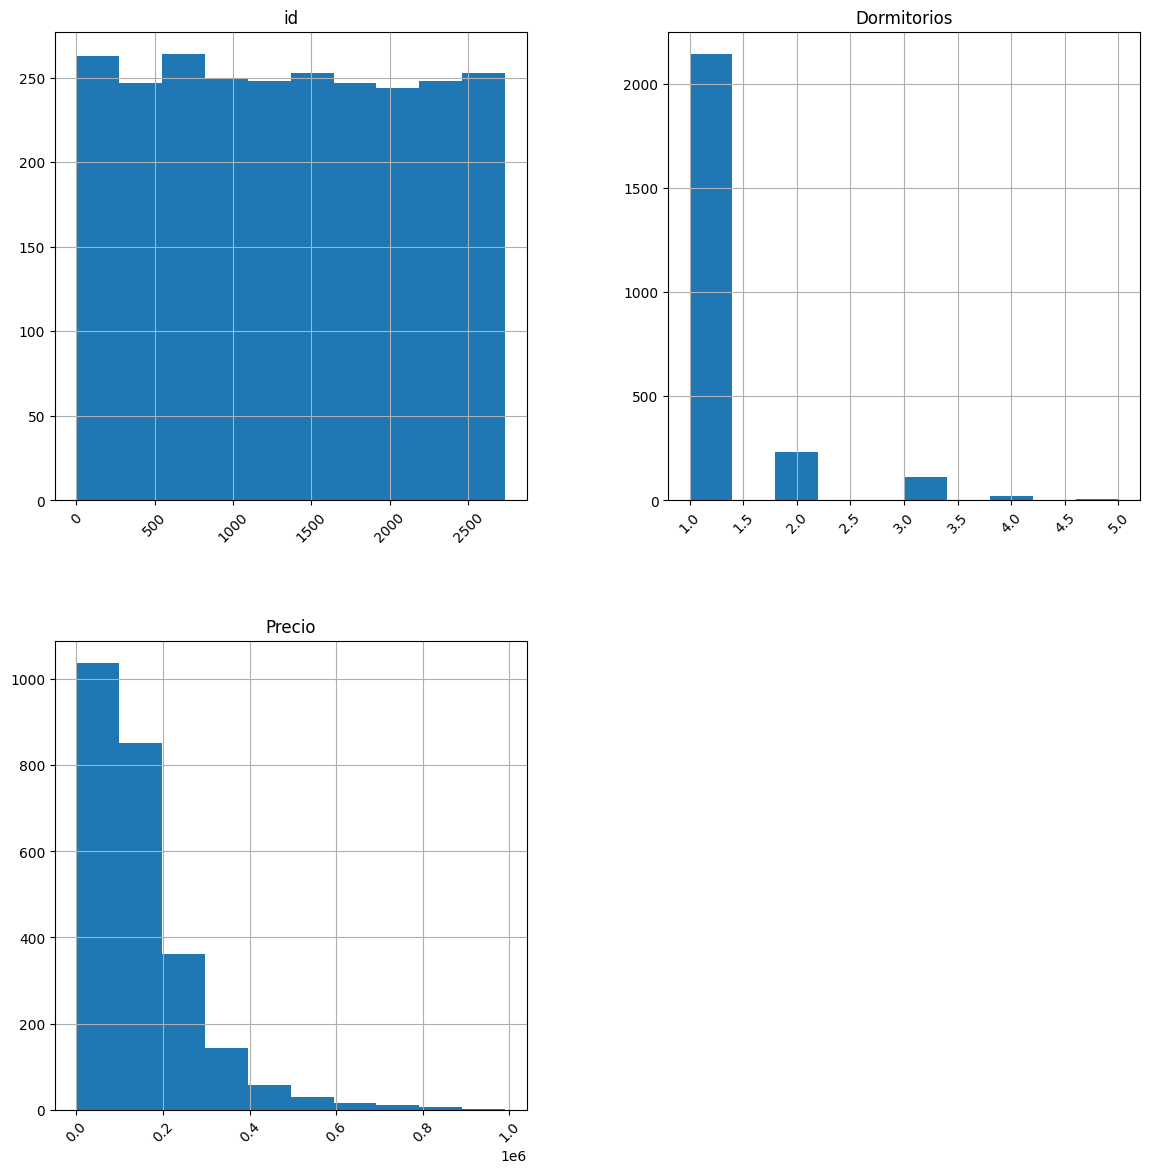

In [168]:
Cordoba_PV.hist(figsize=(14,14), xrot=45)

Estadísticas resumidas de las características numéricas.

Ahora que tenemos una idea intuitiva de las funciones numéricas, veremos las estadísticas reales mediante las  df.describe()cuales se muestran sus estadísticas resumidas.

In [124]:
Cordoba_PV.describe()

,id,Dormitorios,Precio
count,2516.000000,1364.000000,2516.000000
mean,1358.296105,1.806452,141736.299682
std,792.919653,0.913301,129120.048762
min,1.000000,1.000000,3.000000
25%,673.750000,1.000000,50000.000000
50%,1352.500000,2.000000,120000.000000
75%,2045.250000,2.000000,195000.000000
max,2736.000000,4.000000,990000.000000


Estadísticas resumidas de las características categóricas.

Para verificar las estadísticas resumidas solo de las características categóricas, usaremos df.describe(include=’object’)

In [125]:
Cordoba_PV.describe(include='object')

,TipoDeInmueble,TipoDeOperacion,Moneda,Zona,FechaDeActualización,Descripcion
count,2516,2516,2516,2516,2516,2516
unique,11,1,2,265,231,2423
top,Departamento,Alquiler,Pesos,Bº Centro,08.10.2023,1 dormitorio Nueva Córdoba
freq,1192,2516,2221,512,875,8


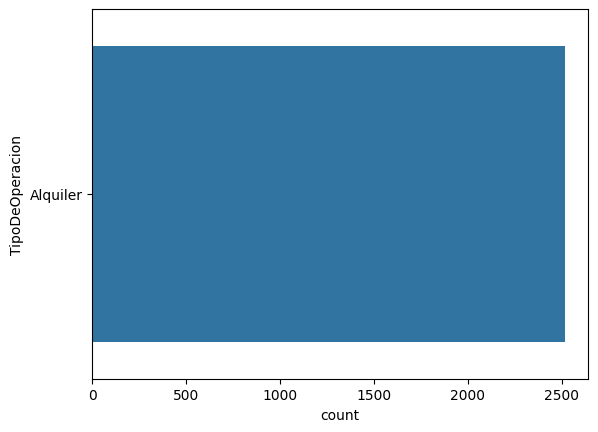

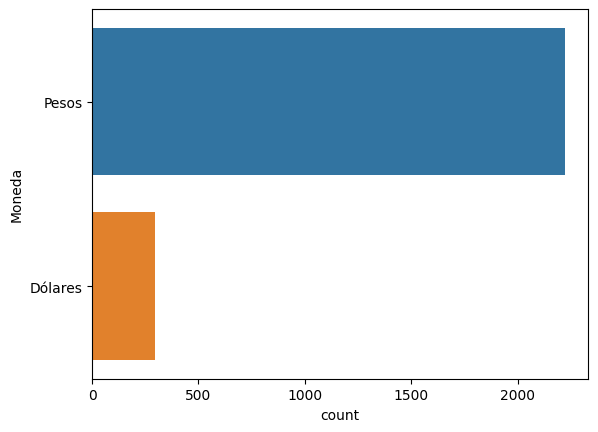

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt


for column in Cordoba_PV.select_dtypes(include='object'):
    if Cordoba_PV[column].nunique() < 10:
        sns.countplot(y=column, data=Cordoba_PV)
        plt.show()

La matriz de dispersión scatter matrix, es una herramienta gráfica que muestra las relaciones de dispersión y distribución entre varias variables en un conjunto de datos

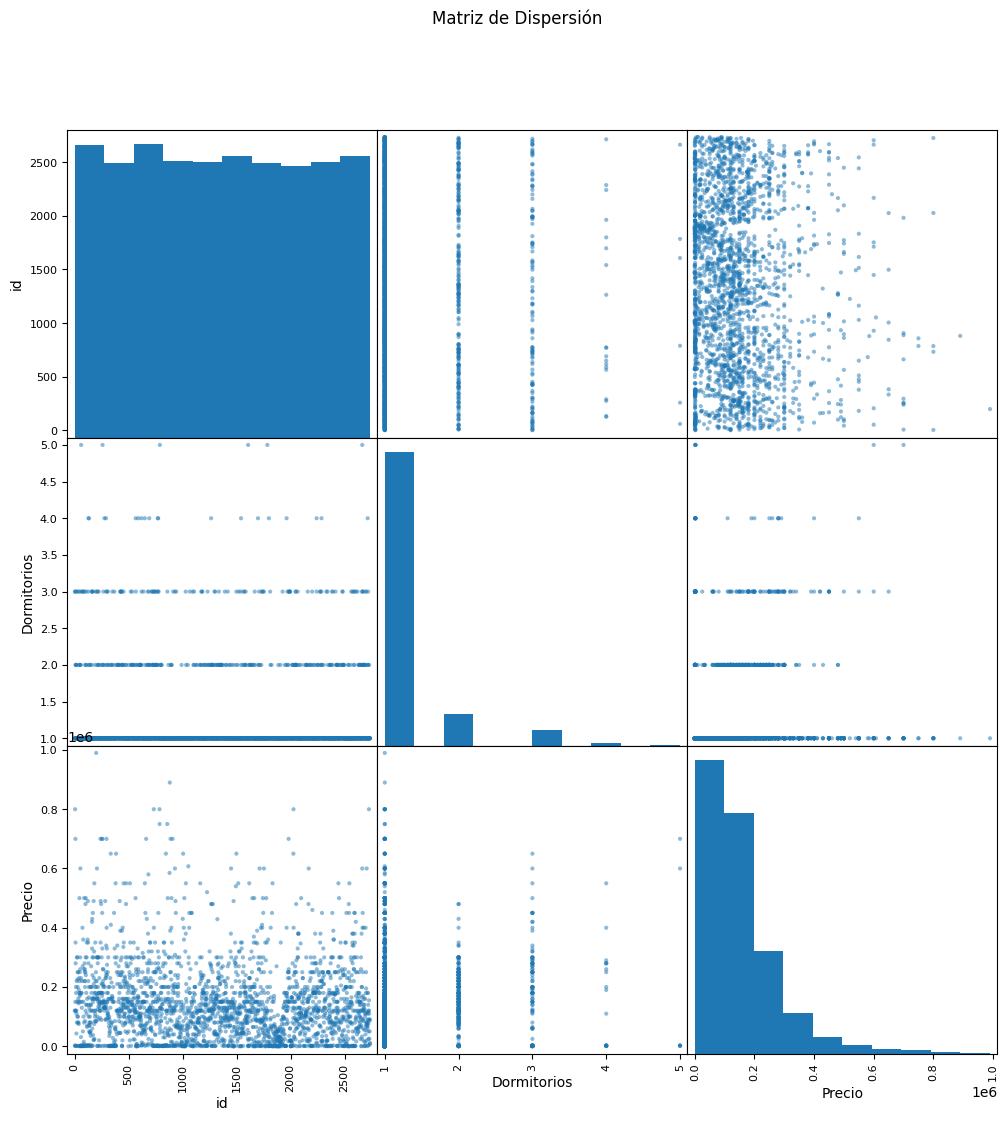

In [170]:
#"quiero hacer un Scatter Matrix"
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix



# Crea la matriz de dispersión
scatter_matrix(Cordoba_PV, figsize=(12, 12))

# Ajusta los títulos de los subgráficos
plt.suptitle('Matriz de Dispersión')

# Muestra la matriz de dispersión
plt.show()